The link from SkillCraft dataset: https://www.kaggle.com/datasets/danofer/skillcraft 
Always read documentation on dataset before to get excellent insights.

This is a starcraft gaming data set. This gives traits about different professional players playing for a particular clan in different league. This data set can be a benchmark dataset which can be used to pool talented players and to answer different questions like:

A. Determine what are the most important features that could help predict a player’s rank? Interpret your results for a general audience (coaching staff, pro players, etc)

B. Your team’s Starcraft2 coaching staff loved your project! They think this is perfect for scouting rising stars. Using your discoveries from (3), create a function to find players who should be given a chance to become professionals. Explain why your set of players make sense.

C. Hypothetically, if you were to move forward with creating a fully-fledged model to predict LeagueIndex, what model(s) would you consider and why? (Don’t actually implement anything!)


- GameID: Unique ID number for each game (integer)
- LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)
- Age: Age of each player (integer)
- HoursPerWeek: Reported hours spent playing per week (integer)
- TotalHours: Reported total hours spent playing (integer)
- APM: Action per minute (continuous)
- SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)
- AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)
- UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)
- MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)
- MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)
- NumberOfPACs: Number of PACs per timestamp (continuous)
- GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)
- ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)
- ActionsInPAC: Mean number of actions within each PAC (continuous)
- TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)
- WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)
- UniqueUnitsMade: Unique unites made per timestamp (continuous)
- ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
- ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

<div style='background-color:#414; font-size:20px; padding:10px; font-weight: bold;'>1.0 Experiment # 1: Performance with 7 classifications (learning curve 1.4)</div>

Underfitting:

- First reason is more data could help.
- Minimum restriction is applied to the model to improve a bit to understand the complexity of the data.
- More independant features could help. As it is, there is a lot multicolinearity.


<div style='background-color:#414; font-size:20px; padding:15px; font-weight: bold;'>2.0 Experiment # 2: Performance with 2 classifications (learning curve 2.3)</div>

Better Performance:
- Reducing classification also reduce complexity significantly.
- Comparison between 2 groups of players still apply for the observation.
- Generalize better with the same amount of data.


<div style='background-color:#414; font-size:20px; padding:15px; font-weight: bold;'> 3.0:  Questions & Answer </div>
- A: The findings suggest that the most important skilss to improve are the Action Per      
  Minutes(APM) and the total of experiences in the game(TotalHours). While total of hours passed in a game is not a secret the APM could be a bit tricky here is an article how to improve this. 
https://gaming.stackexchange.com/questions/3975/how-to-increase-actions-per-minute
https://en.wikipedia.org/wiki/Actions_per_minute

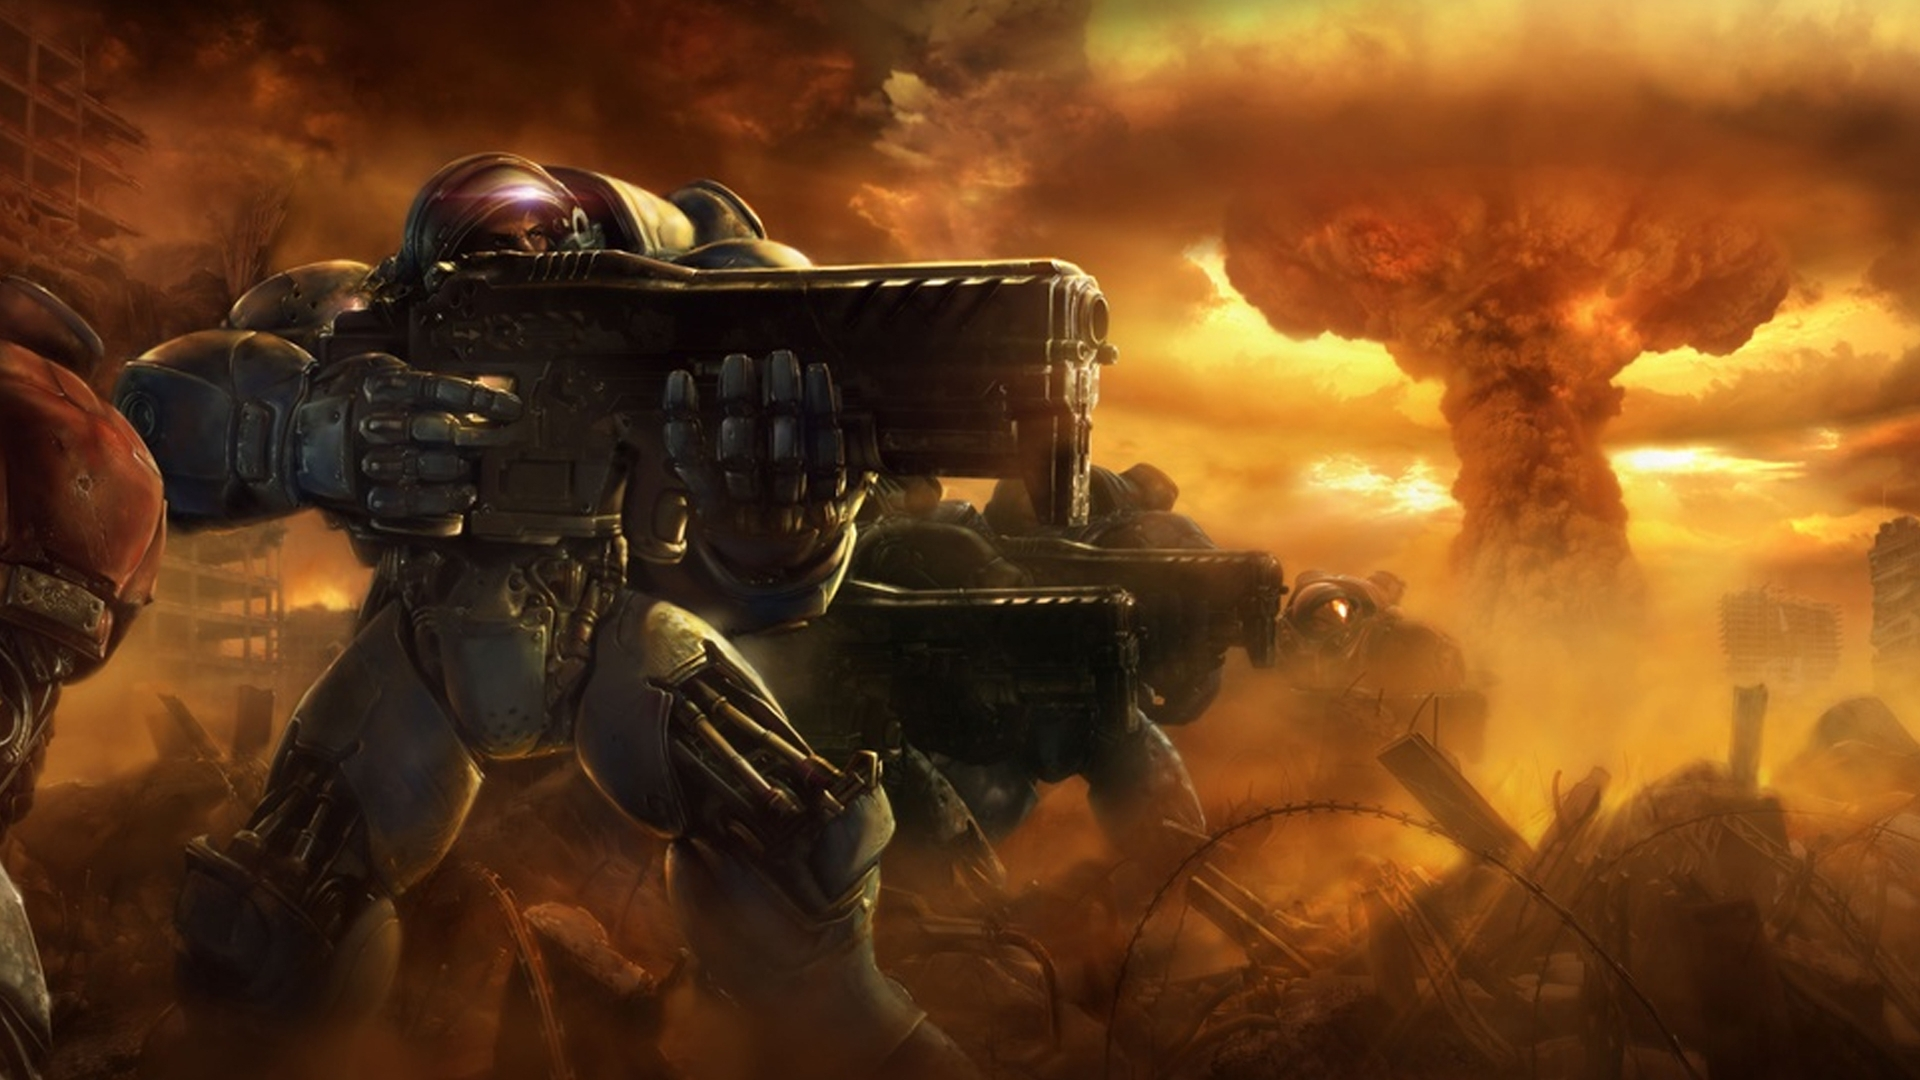


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ScikitLearn library
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score

# Model choice for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Explanation AI
import shap
shap.initjs();


# Experiment # 1

## Data studying

In [2]:
sc_data = pd.read_csv('data/starcraft_player_data.csv')
sc_data.head()

GameID  LeagueIndex Age HoursPerWeek TotalHours       APM  SelectByHotkeys  \
0      52            5  27           10       3000  143.7180         0.003515   
1      55            5  23           10       5000  129.2322         0.003304   
2      56            4  30           10        200   69.9612         0.001101   
3      57            3  19           20        400  107.6016         0.001034   
4      58            3  32           10        500  122.8908         0.001136   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0         0.000220              7        0.000110            0.000392   
1         0.000259              4        0.000294            0.000432   
2         0.000336              4        0.000294            0.000461   
3         0.000213              1        0.000053            0.000543   
4         0.000327              2        0.000000            0.001329   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.004849         32.6677        40.8673        4.7508   
1      0.004307         32.9194        42.3454        4.8434   
2      0.002926         44.6475        75.3548        4.0430   
3      0.003783         29.2203        53.7352        4.9155   
4      0.002368         22.6885        62.0813        9.3740   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0                28     0.001397                6               0.0   
1                22     0.001193                5               0.0   
2                22     0.000745                6               0.0   
3                19     0.000426                7               0.0   
4                15     0.001174                4               0.0   

   ComplexAbilitiesUsed  
0              0.000000  
1              0.000208  
2              0.000189  
3              0.000384  
4              0.000019

In [3]:
sc_data['LeagueIndex'].unique()

array([5, 4, 3, 2, 1, 7, 6, 8])

In [4]:
# Checks all columns unique values

for d in sc_data:
    if d != 'GameID':
        print(d + ':')
        print(f'{sc_data[d].unique()}\n')

LeagueIndex:
[5 4 3 2 1 7 6 8]

Age:
['27' '23' '30' '19' '32' '21' '17' '20' '18' '16' '26' '38' '28' '25'
 '22' '29' '24' '35' '31' '33' '37' '40' '34' '43' '41' '36' '44' '39' '?']

HoursPerWeek:
['10' '20' '6' '8' '42' '14' '24' '16' '4' '12' '30' '28' '70' '2' '56'
 '36' '40' '18' '96' '50' '168' '48' '84' '0' '72' '112' '90' '32' '98'
 '140' '?' '80' '60']

TotalHours:
['3000' '5000' '200' '400' '500' '70' '240' '10000' '2708' '800' '6000'
 '190' '350' '1000' '1500' '2000' '120' '1100' '2520' '700' '160' '150'
 '250' '730' '230' '300' '100' '270' '1200' '30' '600' '540' '280' '1600'
 '50' '140' '900' '550' '625' '1300' '450' '750' '612' '180' '770' '720'
 '415' '1800' '2200' '480' '430' '639' '360' '1250' '365' '650' '233'
 '416' '1825' '780' '1260' '315' '10' '312' '110' '1700' '92' '2500'
 '1400' '220' '999' '303' '96' '184' '4000' '420' '60' '2400' '2160' '80'
 '25' '624' '176' '?' '35' '1163' '333' '75' '7' '40' '325' '90' '175'
 '88' '850' '26' '1650' '465' '235' '1350' '460

In [5]:
sc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

## Clean


In [6]:
# Drop League, Age, TotalHour,HoursPerWeek Index with '?'

columns = ['Age', 'HoursPerWeek', 'TotalHours']

sc_data[columns] = sc_data[columns].apply(pd.to_numeric, errors='coerce', axis = 1)


sc_data.dropna(subset=['Age', 'HoursPerWeek', 'TotalHours'] ,inplace= True)
sc_data.isna().sum()



GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [7]:
# Provide a function to check the balance of classification

def print_balance(series)-> None:
    """
    print_balance(series = 1D data)
    
    series: Series,
        better result with few unique values.
    
    description:
        Check the sum of each uniques values. As a details, it prints a summary
        with the series info build-in from pandas and a list of the 
        amount of each unique values as well.
        
    """
       
    if type(series) != pd.Series:
        
        raise Exception(f'Type of argument is {type(series)}. Type of {type(pd.Series)} was expected.')
        
    else:
        
        val = np.zeros((1, len(series.unique()))).tolist()[0]
        uniques = sorted(series.unique())
        class_val_dict = {k: int(v) for k,v in zip(uniques, val)}

        for _class in series: 
            class_val_dict[_class] += 1
        print('Serie Info')
        print(series.info())
        for k,v in class_val_dict.items():
            print(f'{k} = {v}')


print_balance(sc_data['LeagueIndex'])

Serie Info
<class 'pandas.core.series.Series'>
Int64Index: 3338 entries, 0 to 3339
Series name: LeagueIndex
Non-Null Count  Dtype
--------------  -----
3338 non-null   int64
dtypes: int64(1)
memory usage: 52.2 KB
None
1 = 167
2 = 347
3 = 553
4 = 811
5 = 804
6 = 621
7 = 35


## Pipeline

In [8]:
pipeline = make_pipeline(
    SMOTE(random_state=42),
    StandardScaler(),
    DecisionTreeClassifier(min_samples_leaf= 100, min_samples_split= 100, random_state=42)
)


In [9]:

X = sc_data.drop(columns=['LeagueIndex', 'GameID'], axis= 1)
y = sc_data['LeagueIndex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_leaf=100,
                                        min_samples_split=100,
                                        random_state=42))])

## Explanation of original data findings

In [10]:
scorer = make_scorer(accuracy_score)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.34
              precision    recall  f1-score   support

           1       0.25      0.54      0.35        24
           2       0.35      0.23      0.28        69
           3       0.29      0.45      0.35       102
           4       0.36      0.36      0.36       151
           5       0.38      0.20      0.26       157
           6       0.46      0.38      0.41       161
           7       0.04      0.50      0.08         4

    accuracy                           0.34       668
   macro avg       0.31      0.38      0.30       668
weighted avg       0.37      0.34      0.34       668



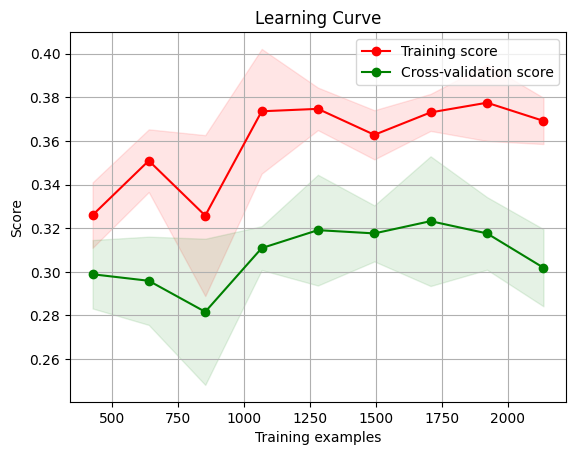

In [11]:
train_sizes, train_scores, test_scores = learning_curve(pipeline,X_train, y_train, cv=5, scoring=scorer, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the fill between mean and std deviation for training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
# Plot the fill between mean and std deviation for testing scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
# Plot the mean scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

The learning curves indicates that it is underfiting. The score is low but the curve keeps growing:
- First reason is there is not enough data to understand the complexity of variance.
- Minimum sample leaf and split has improved a bit the model but not enough unfortunately. 
- More independant features could help to tackle the underfitting.

## Answering Questions

# Experiment # 2

## Data and Cleaning

In [12]:
sc_data = pd.read_csv('data/starcraft_player_data.csv')
# Change columns to numeric
# Drop League, Age, TotalHour,HoursPerWeek Index with '?'
# And pipeline

columns = ['Age', 'HoursPerWeek', 'TotalHours']
sc_data[columns] = sc_data[columns].apply(pd.to_numeric, errors='coerce', axis = 1)


sc_data.dropna(subset=['Age', 'HoursPerWeek', 'TotalHours'] ,inplace= True)
sc_data.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

## Pipeline

In [13]:
thresold = 3
def simple_class(x):
    return 1 if x >= thresold else 0
     
sc_data['LeagueIndex'] = sc_data['LeagueIndex'].apply(simple_class)
sc_data['LeagueIndex'].unique()

X = sc_data.drop(columns=['LeagueIndex', 'GameID'], axis= 1)
y = sc_data['LeagueIndex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = make_pipeline(
    SMOTE(random_state=42),
    StandardScaler(),
    DecisionTreeClassifier(min_samples_leaf= 100, min_samples_split= 100, random_state=42)
)

pipeline.fit(X_train,y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_leaf=100,
                                        min_samples_split=100,
                                        random_state=42))])

In [14]:
scorer = make_scorer(accuracy_score)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(y_pred.shape)

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.45      0.76      0.56        93
           1       0.96      0.85      0.90       575

    accuracy                           0.84       668
   macro avg       0.70      0.81      0.73       668
weighted avg       0.89      0.84      0.85       668

(668,)


## Learning curve

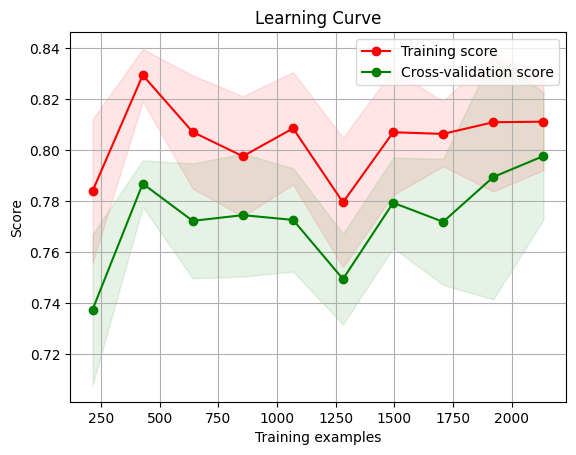

In [15]:
train_sizes, train_scores, test_scores = learning_curve(pipeline,X_train, y_train, cv=5, scoring=scorer, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the fill between mean and std deviation for training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
# Plot the fill between mean and std deviation for testing scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
# Plot the mean scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Better Performance:
- Reducing classification also reduce complexity significantly.
- Comparison between 2 groups of players still apply for the observation.
- Generalize better with the same amount of data.

# Question A,B,C

A. Determine what are the most important features that could help predict a player’s rank? Interpret your results for a general audience (coaching staff, pro players, etc)

PermutationExplainer explainer: 669it [00:14, 14.05it/s]                                                                                                                                                                                                                                


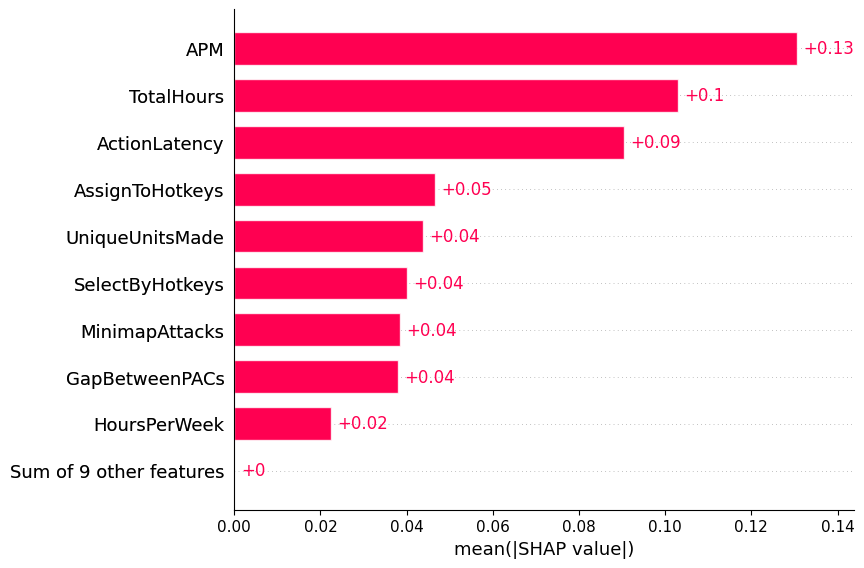

In [59]:
# Using shap explaination to answer the question A by comparing features importance.

def model_predict(data_asarray):
    data_asframe = pd.DataFrame(data_asarray, columns=X_train.columns)
    return pipeline.predict(data_asframe)

explainer = shap.Explainer(model_predict, X_train)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

B. Your team’s Starcraft2 coaching staff loved your project! They think this is perfect for scouting rising stars. Using your discoveries from (3), create a function to find players who should be given a chance to become professionals. Explain why your set of players make sense.

In [75]:
# Amongs playersTotal of hours is the most relevant as it reveals commitment and should be considered.
# While APM is a bias because this parameter could be raise easily regardless of performance.

def commitment_players():
    poor_performance = sc_data['LeagueIndex'] == 0
    high_performance = sc_data['LeagueIndex'] == 1
    print(sc_data[poor_performance]['TotalHours'].mean())
    print(sc_data[high_performance]['TotalHours'].mean())

commitment_players()

309.57003891050584
1078.884206798867
